In [1]:
from os.path import join, isdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical

# 시계열 데이터 예측

(400,)


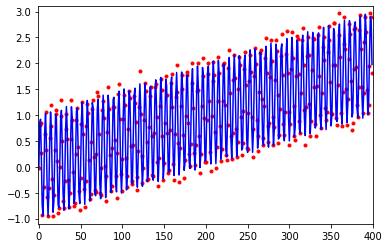

In [2]:
data_time = np.sin(np.arange(400)) + np.random.normal(0, 0.1, 400) + np.arange(400)/200 
print(data_time.shape)
plt.plot(data_time, 'r.')
plt.plot(range(400), np.sin(np.arange(400)) + np.arange(400)/200, 'b') # 
plt.xlim(-0.5, 400.5)
plt.ylim(-1.1, 3.1)
plt.show()

## 문제 정의: 3개의 입력을 보고 다음의 1개를 맞추는 문제

### 1. MLP

In [3]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(397, 4)
[[-0.02097956  0.80719422  0.8511634   0.26030354]
 [ 0.80719422  0.8511634   0.26030354 -0.92762726]
 [ 0.8511634   0.26030354 -0.92762726 -1.2218251 ]
 ...
 [ 1.03882551  1.18902612  1.95372289  2.96728621]
 [ 1.18902612  1.95372289  2.96728621  2.89537109]
 [ 1.95372289  2.96728621  2.89537109  1.81981256]]


In [4]:
datax = data_matrix_np[:,0:3]
datay = data_matrix_np[:,3]
print(datax.shape)
print(datay.shape)

(397, 3)
(397,)


In [5]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 3)
(97, 3)
(300,)
(97,)


In [6]:
input_shape = (3,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 5, activation = 'tanh', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_model.add(layers.Dense(units = 1, activation = 'linear'))

mlp_model.compile(optimizer='Adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [7]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Train on 300 samples, validate on 97 samples
Epoch 1/300
300/300 [==============================] - 1s 2ms/sample - loss: 1.2083 - mean_squared_error: 1.2083 - val_loss: 3.0712 - val_mean_squared_error: 3.0712
Epoch 2/300
300/300 [==============================] - 0s 189us/sample - loss: 0.9821 - mean_squared_error: 0.9821 - val_loss: 2.5078 - val_mean_squared_error: 2.5078
Epoch 3/300
300/300 [==============================] - 0s 196us/sample - loss: 0.7835 - mean_squared_error: 0.7835 - val_loss: 1.9778 - val_mean_squared_error: 1.9778
Epoch 4/300
300/300 [==============================] - 0s 189us/sample - loss: 0.6022 - mean_squared_error: 0.6022 - val_loss: 1.5915 - val_mean_squared_error: 1.5915
Epoch 5/300
300/300 [==============================] - 0s 196us/sample - loss: 0.4671 - mean_squared_error: 0.4671 - val_loss: 1.3045 - val_mean_squared_error: 1.3045
Epoch 6/300
300/300 [==============================] - 0s 199us/sample - loss: 0.3659 - mean_squared_error: 0.3659 - val_l

300/300 [==============================] - 0s 209us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.1998 - val_mean_squared_error: 0.1998
Epoch 50/300
300/300 [==============================] - 0s 203us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.1861 - val_mean_squared_error: 0.1861
Epoch 51/300
300/300 [==============================] - 0s 209us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 52/300
300/300 [==============================] - 0s 209us/sample - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 53/300
300/300 [==============================] - 0s 203us/sample - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.1635 - val_mean_squared_error: 0.1635
Epoch 54/300
300/300 [==============================] - 0s 249us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.1917 - val_mean_squared_error: 0.1917
Epoch

Epoch 98/300
300/300 [==============================] - 0s 199us/sample - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 99/300
300/300 [==============================] - 0s 189us/sample - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.1777 - val_mean_squared_error: 0.1777
Epoch 100/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 101/300
300/300 [==============================] - 0s 189us/sample - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.1631 - val_mean_squared_error: 0.1631
Epoch 102/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.2454 - val_mean_squared_error: 0.2454
Epoch 103/300
300/300 [==============================] - 0s 203us/sample - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.1419 - val_mean_squared_er

300/300 [==============================] - 0s 206us/sample - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 147/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 148/300
300/300 [==============================] - 0s 199us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 149/300
300/300 [==============================] - 0s 193us/sample - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.1633 - val_mean_squared_error: 0.1633
Epoch 150/300
300/300 [==============================] - 0s 189us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.1379 - val_mean_squared_error: 0.1379
Epoch 151/300
300/300 [==============================] - 0s 199us/sample - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.1610 - val_mean_squared_error: 0.1610


300/300 [==============================] - 0s 199us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 195/300
300/300 [==============================] - 0s 216us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 196/300
300/300 [==============================] - 0s 199us/sample - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.1777 - val_mean_squared_error: 0.1777
Epoch 197/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 198/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 199/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.1605 - val_mean_squared_error: 0.1605


300/300 [==============================] - 0s 209us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.1459 - val_mean_squared_error: 0.1459
Epoch 243/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1888 - val_mean_squared_error: 0.1888
Epoch 244/300
300/300 [==============================] - 0s 189us/sample - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 245/300
300/300 [==============================] - 0s 206us/sample - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 246/300
300/300 [==============================] - 0s 206us/sample - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 247/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1593 - val_mean_squared_error: 0.1593


300/300 [==============================] - 0s 203us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.1478 - val_mean_squared_error: 0.1478
Epoch 291/300
300/300 [==============================] - 0s 206us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 292/300
300/300 [==============================] - 0s 203us/sample - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.1438 - val_mean_squared_error: 0.1438
Epoch 293/300
300/300 [==============================] - 0s 193us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.1663 - val_mean_squared_error: 0.1663
Epoch 294/300
300/300 [==============================] - 0s 196us/sample - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 295/300
300/300 [==============================] - 0s 216us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.1556 - val_mean_squared_error: 0.1556


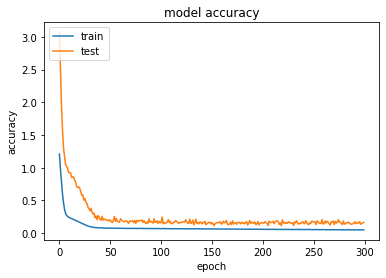

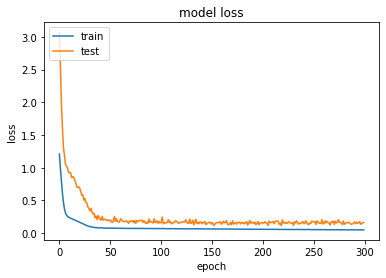

In [9]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

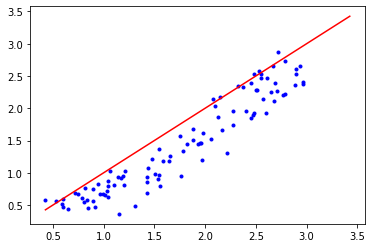

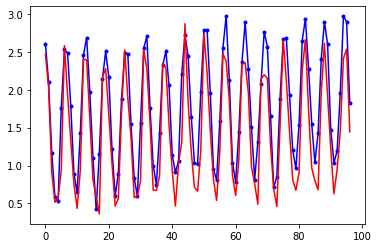

Final validation error is: 0.162031


In [10]:
plt.plot(tsty, mlp_model.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+0.5),np.arange(min(tsty),max(tsty)+0.5), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), mlp_model.predict(tstx), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))

### 2. RNN

Keras 에서 RNN 을 사용하려면 입력 데이터는 (nb_samples, timesteps, input_dim) 크기를 가지는 ndim=3인 3차원 텐서(tensor) 형태이어야 합니다.
- nb_samples(= batch_size) : 자료의 수
- timesteps(= sequemce_length) : 순서열의 길이

- input_dim(= data_dim) : 입력 벡터의 차원

### Many to Many

In [11]:
batch_size = 10
sequence_length = 4
data_dim = 3

In [12]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:3]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,3]
print(datax.shape)
print(datay.shape)

(396, 3)
(396,)


In [13]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)

(99, 4, 3)
(99, 4, 1)


In [15]:
print(datax[0])
print(datay[0])

[[-0.02097956  0.80719422  0.8511634 ]
 [ 0.80719422  0.8511634   0.26030354]
 [ 0.8511634   0.26030354 -0.92762726]
 [ 0.26030354 -0.92762726 -1.2218251 ]]
[[ 0.26030354]
 [-0.92762726]
 [-1.2218251 ]
 [-0.39837655]]


In [16]:
trnx = datax[0:70, :]
trny = datay[0:70]
tstx = datax[70:datax.shape[0],:]
tsty = datay[70:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(70, 4, 3)
(29, 4, 3)
(70, 4, 1)
(29, 4, 1)


In [18]:
# 입력 텐서
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [31]:
rnn_layer = layers.LSTM(10, return_sequences=True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1,activation='linear'))(rnn_layer)

In [32]:
# 모델 컴파일.
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer = 'Adam',loss = 'mean_squared_error',metrics = ['mean_squared_error'])

In [33]:
model_mtom.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 3)]            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 10)             560       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 1)              11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model_mtom.fit(trnx, trny, validation_data = [tstx, tsty], epochs=500, batch_size=10,  verbose=2)

Train on 70 samples, validate on 29 samples
Epoch 1/500
70/70 - 1s - loss: 1.3732 - mean_squared_error: 1.3732 - val_loss: 3.7570 - val_mean_squared_error: 3.7570
Epoch 2/500
70/70 - 0s - loss: 1.3041 - mean_squared_error: 1.3041 - val_loss: 3.4993 - val_mean_squared_error: 3.4993
Epoch 3/500
70/70 - 0s - loss: 1.2439 - mean_squared_error: 1.2439 - val_loss: 3.2670 - val_mean_squared_error: 3.2670
Epoch 4/500
70/70 - 0s - loss: 1.1934 - mean_squared_error: 1.1934 - val_loss: 3.0563 - val_mean_squared_error: 3.0563
Epoch 5/500
70/70 - 0s - loss: 1.1465 - mean_squared_error: 1.1465 - val_loss: 2.8777 - val_mean_squared_error: 2.8777
Epoch 6/500
70/70 - 0s - loss: 1.1040 - mean_squared_error: 1.1040 - val_loss: 2.7256 - val_mean_squared_error: 2.7256
Epoch 7/500
70/70 - 0s - loss: 1.0705 - mean_squared_error: 1.0705 - val_loss: 2.5857 - val_mean_squared_error: 2.5857
Epoch 8/500
70/70 - 0s - loss: 1.0381 - mean_squared_error: 1.0381 - val_loss: 2.4675 - val_mean_squared_error: 2.4675
Epoc

Epoch 69/500
70/70 - 0s - loss: 0.1618 - mean_squared_error: 0.1618 - val_loss: 0.4340 - val_mean_squared_error: 0.4340
Epoch 70/500
70/70 - 0s - loss: 0.1589 - mean_squared_error: 0.1589 - val_loss: 0.4253 - val_mean_squared_error: 0.4253
Epoch 71/500
70/70 - 0s - loss: 0.1564 - mean_squared_error: 0.1564 - val_loss: 0.4218 - val_mean_squared_error: 0.4218
Epoch 72/500
70/70 - 0s - loss: 0.1536 - mean_squared_error: 0.1536 - val_loss: 0.4185 - val_mean_squared_error: 0.4185
Epoch 73/500
70/70 - 0s - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.4099 - val_mean_squared_error: 0.4099
Epoch 74/500
70/70 - 0s - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 75/500
70/70 - 0s - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 76/500
70/70 - 0s - loss: 0.1435 - mean_squared_error: 0.1435 - val_loss: 0.3881 - val_mean_squared_error: 0.3881
Epoch 77/500
70/70 - 0s - loss: 0.1411 -

Epoch 137/500
70/70 - 0s - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 138/500
70/70 - 0s - loss: 0.0783 - mean_squared_error: 0.0783 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 139/500
70/70 - 0s - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 140/500
70/70 - 0s - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 141/500
70/70 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 142/500
70/70 - 0s - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 143/500
70/70 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.2656 - val_mean_squared_error: 0.2656
Epoch 144/500
70/70 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.2706 - val_mean_squared_error: 0.2706
Epoch 145/500
70/70 - 0s - loss:

Epoch 205/500
70/70 - 0s - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 206/500
70/70 - 0s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 207/500
70/70 - 0s - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 208/500
70/70 - 0s - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.2318 - val_mean_squared_error: 0.2318
Epoch 209/500
70/70 - 0s - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 210/500
70/70 - 0s - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 211/500
70/70 - 0s - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.2255 - val_mean_squared_error: 0.2255
Epoch 212/500
70/70 - 0s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 213/500
70/70 - 0s - loss:

Epoch 273/500
70/70 - 0s - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.1840 - val_mean_squared_error: 0.1840
Epoch 274/500
70/70 - 0s - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.1823 - val_mean_squared_error: 0.1823
Epoch 275/500
70/70 - 0s - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.1772 - val_mean_squared_error: 0.1772
Epoch 276/500
70/70 - 0s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.1782 - val_mean_squared_error: 0.1782
Epoch 277/500
70/70 - 0s - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1832 - val_mean_squared_error: 0.1832
Epoch 278/500
70/70 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 279/500
70/70 - 0s - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.1757 - val_mean_squared_error: 0.1757
Epoch 280/500
70/70 - 0s - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.1761 - val_mean_squared_error: 0.1761
Epoch 281/500
70/70 - 0s - loss:

Epoch 341/500
70/70 - 0s - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1461 - val_mean_squared_error: 0.1461
Epoch 342/500
70/70 - 0s - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 343/500
70/70 - 0s - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 344/500
70/70 - 0s - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 345/500
70/70 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 346/500
70/70 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.1408 - val_mean_squared_error: 0.1408
Epoch 347/500
70/70 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 348/500
70/70 - 0s - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.1411 - val_mean_squared_error: 0.1411
Epoch 349/500
70/70 - 0s - loss:

Epoch 409/500
70/70 - 0s - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 410/500
70/70 - 0s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 411/500
70/70 - 0s - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch 412/500
70/70 - 0s - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 413/500
70/70 - 0s - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 414/500
70/70 - 0s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.1133 - val_mean_squared_error: 0.1133
Epoch 415/500
70/70 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 416/500
70/70 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1196 - val_mean_squared_error: 0.1196
Epoch 417/500
70/70 - 0s - loss:

Epoch 477/500
70/70 - 0s - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 478/500
70/70 - 0s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 479/500
70/70 - 0s - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 480/500
70/70 - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1082 - val_mean_squared_error: 0.1082
Epoch 481/500
70/70 - 0s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1105 - val_mean_squared_error: 0.1105
Epoch 482/500
70/70 - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 483/500
70/70 - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.1069 - val_mean_squared_error: 0.1069
Epoch 484/500
70/70 - 0s - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1071 - val_mean_squared_error: 0.1071
Epoch 485/500
70/70 - 0s - loss:

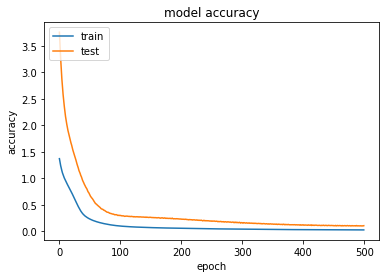

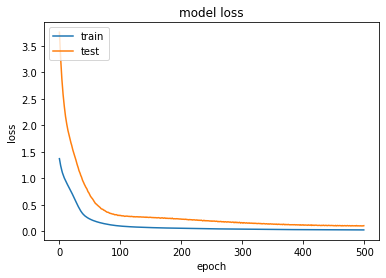

In [35]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
tmp = np.reshape(tsty, (-1, 1))
print(tsty.shape)
print(tmp.shape)
print(max(tmp))

(29, 4, 1)
(116, 1)
[2.96827813]


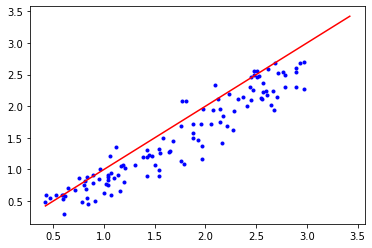

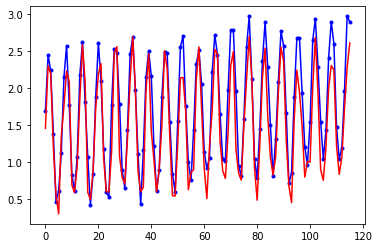

Final validation error is: 0.109111


In [37]:
plt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)), 'b.')
plt.plot(np.arange(min(tmp),max(tmp)+0.5),np.arange(min(tmp),max(tmp)+0.5), 'r')
plt.show()

plt.plot(range(tmp.shape[0]), tmp, 'b.-')
plt.plot(range(tmp.shape[0]), np.reshape(model_mtom.predict(tstx), (-1,1)), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))

### Many to One

In [38]:
data_time.shape

(400,)

In [40]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-data_dim*sequence_length):
    tmp_data = data_time[i:i+data_dim*sequence_length+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(388, 13)
[[-0.02097956  0.80719422  0.8511634  ... -0.58134827 -0.94320222
  -0.41778856]
 [ 0.80719422  0.8511634   0.26030354 ... -0.94320222 -0.41778856
   0.55922594]
 [ 0.8511634   0.26030354 -0.92762726 ... -0.41778856  0.55922594
   1.18561528]
 ...
 [ 2.93746409  2.2783543   1.54365176 ...  1.18902612  1.95372289
   2.96728621]
 [ 2.2783543   1.54365176  1.04056347 ...  1.95372289  2.96728621
   2.89537109]
 [ 1.54365176  1.04056347  1.42488926 ...  2.96728621  2.89537109
   1.81981256]]


In [41]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,12]
print(datax.shape)
print(datay.shape)

(387, 12)
(387,)


In [42]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
print(datax.shape)
print(datay.shape)

(387, 4, 3)
(387,)


In [43]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 4, 3)
(87, 4, 3)
(300,)
(87,)


In [44]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [45]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

In [46]:
# 모델 컴파일.
model_mtoo = models.Model(input_tensor, output_tensor)
model_mtoo.compile(optimizer = 'Adam',loss = 'mean_squared_error',metrics = ['mean_squared_error'])

In [47]:
model_mtoo.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 3)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model_mtoo.fit(trnx, trny, validation_data = [tstx, tsty], epochs=300, batch_size=10,  verbose=2)

Train on 300 samples, validate on 87 samples
Epoch 1/300
300/300 - 2s - loss: 0.8080 - mean_squared_error: 0.8080 - val_loss: 1.1494 - val_mean_squared_error: 1.1494
Epoch 2/300
300/300 - 0s - loss: 0.5402 - mean_squared_error: 0.5402 - val_loss: 0.6290 - val_mean_squared_error: 0.6290
Epoch 3/300
300/300 - 0s - loss: 0.4792 - mean_squared_error: 0.4792 - val_loss: 0.5654 - val_mean_squared_error: 0.5654
Epoch 4/300
300/300 - 0s - loss: 0.4305 - mean_squared_error: 0.4305 - val_loss: 0.5244 - val_mean_squared_error: 0.5244
Epoch 5/300
300/300 - 0s - loss: 0.3806 - mean_squared_error: 0.3806 - val_loss: 0.4778 - val_mean_squared_error: 0.4778
Epoch 6/300
300/300 - 0s - loss: 0.3260 - mean_squared_error: 0.3260 - val_loss: 0.3920 - val_mean_squared_error: 0.3920
Epoch 7/300
300/300 - 0s - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.3662 - val_mean_squared_error: 0.3662
Epoch 8/300
300/300 - 0s - loss: 0.2102 - mean_squared_error: 0.2102 - val_loss: 0.2675 - val_mean_squared_e

Epoch 68/300
300/300 - 0s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 69/300
300/300 - 0s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 70/300
300/300 - 0s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 71/300
300/300 - 0s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 72/300
300/300 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 73/300
300/300 - 0s - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 74/300
300/300 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 75/300
300/300 - 0s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 76/300
300/300 - 0

Epoch 135/300
300/300 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 136/300
300/300 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 137/300
300/300 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 138/300
300/300 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 139/300
300/300 - 0s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 140/300
300/300 - 0s - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 141/300
300/300 - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 142/300
300/300 - 0s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 143/300
30

Epoch 202/300
300/300 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 203/300
300/300 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 204/300
300/300 - 0s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 205/300
300/300 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 206/300
300/300 - 0s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 207/300
300/300 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 208/300
300/300 - 0s - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 209/300
300/300 - 0s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 210/300
30

Epoch 269/300
300/300 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 270/300
300/300 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 271/300
300/300 - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 272/300
300/300 - 0s - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 273/300
300/300 - 0s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 274/300
300/300 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 275/300
300/300 - 0s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 276/300
300/300 - 0s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 277/300
30

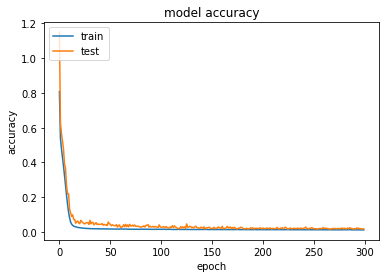

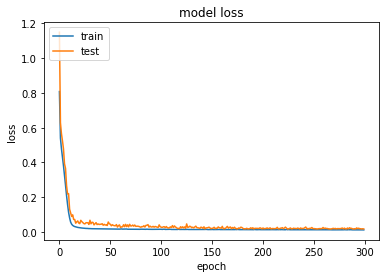

In [49]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

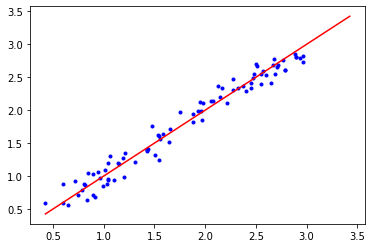

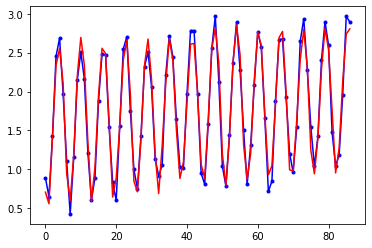

Final validation error is: 0.017554


In [50]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+1),np.arange(min(tsty),max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))